# NY Child and Dependent Care Credit

The NY CDCC is a percentage of the federal CDCC with one modification: the maximum allowable childcare expenses under federal rules are replaced with NY-specific maximums (still dependent on the number of children).

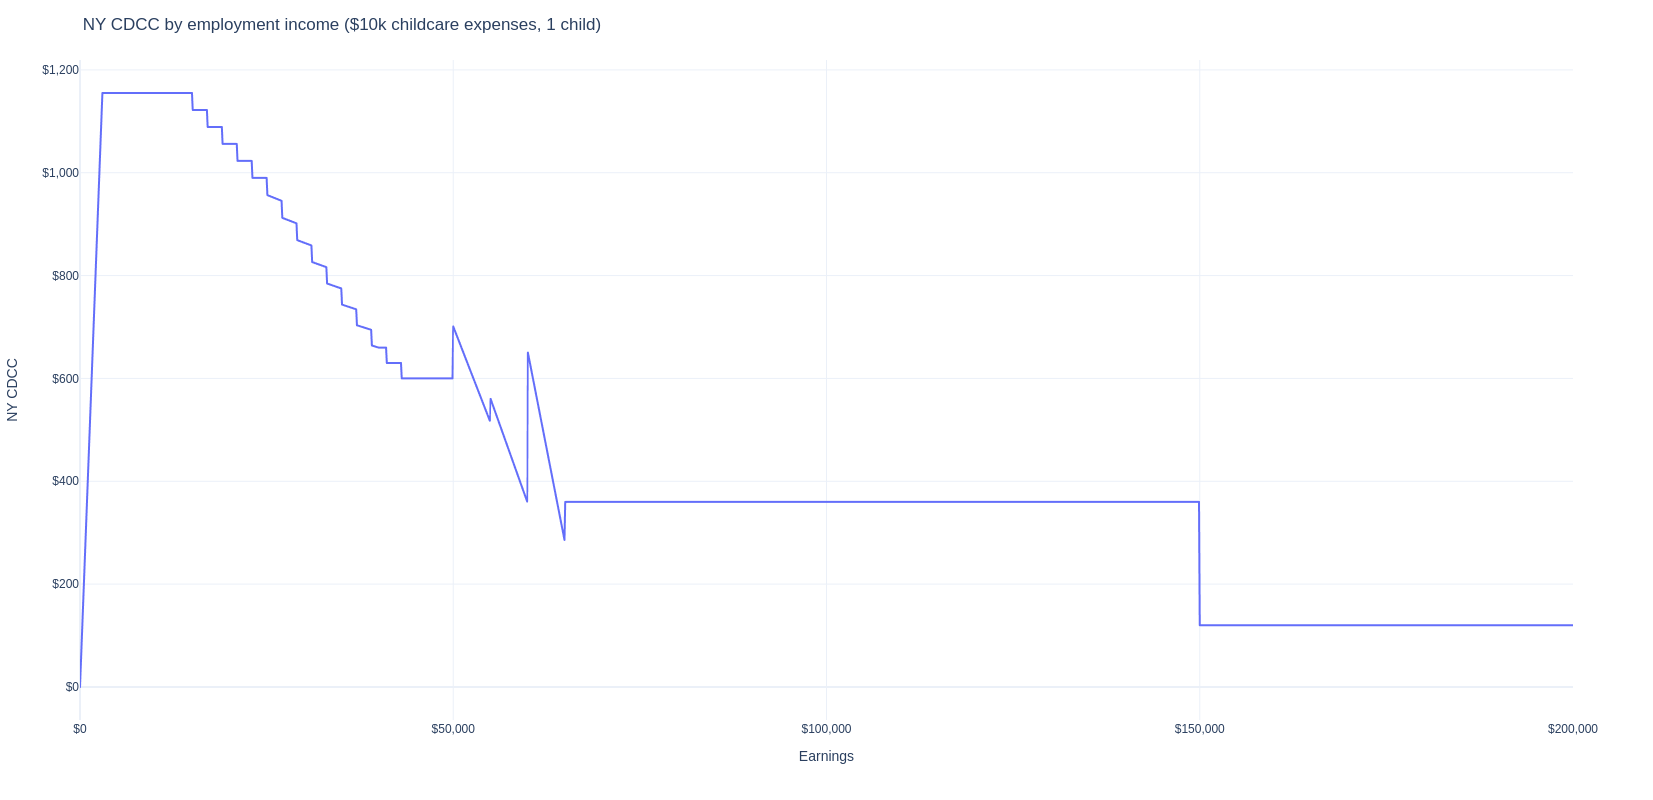

In [16]:
from openfisca_us import IndividualSim
import plotly.express as px

sim = IndividualSim()
sim.add_person(name="parent", age=30)
sim.add_person(name="child", age=6)
sim.add_tax_unit(
    members=["parent", "child"], tax_unit_childcare_expenses=10_000
)
sim.add_household(members=["parent", "child"], state_code="NY")
sim.vary("employment_income")

px.line(
    y=sim.calc("ny_cdcc")[0],
    x=sim.calc("employment_income")[0],
).update_layout(
    yaxis_tickformat="$,.0f",
    xaxis_tickformat="$,.0f",
    height=800,
    width=800,
    xaxis_title="Earnings",
    yaxis_title="NY CDCC",
    title="NY CDCC by employment income ($10k childcare expenses, 1 child)",
    template="plotly_white",
)

The reason for the highly irregular shape of the credit is mostly due to NY legislative decisions. The percentage of the federal credit that defines the NY credit is as shown below. This is the same as the table on [the Form IT-216 instructions](https://www.tax.ny.gov/pdf/current_forms/it/it216i.pdf#page=8).

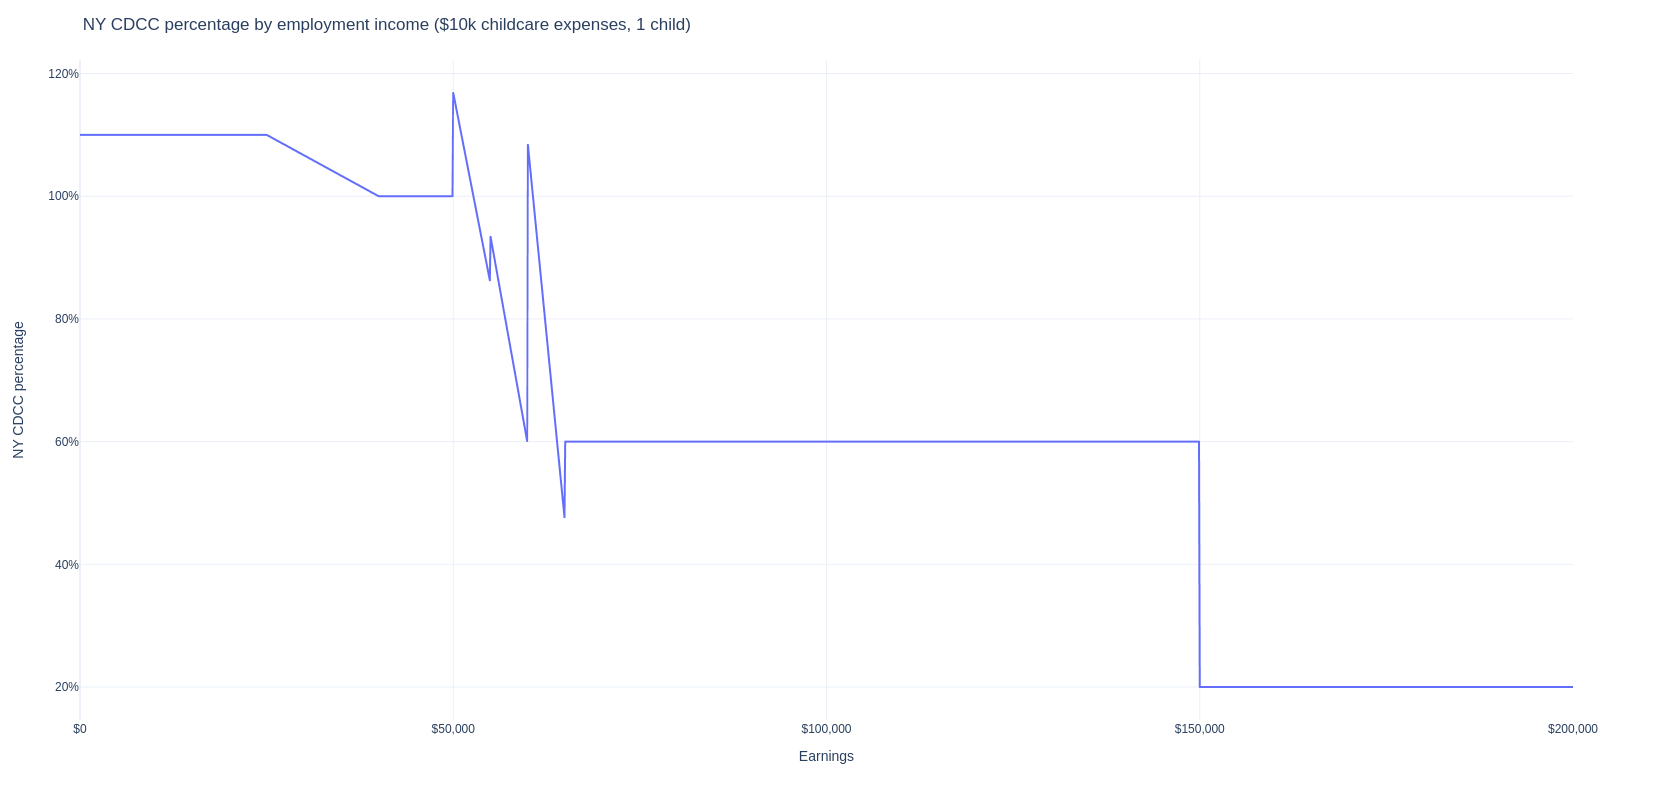

In [17]:
px.line(
    y=sim.calc("ny_cdcc_rate")[0],
    x=sim.calc("employment_income")[0],
).update_layout(
    yaxis_tickformat=".0%",
    xaxis_tickformat="$,.0f",
    height=800,
    width=800,
    xaxis_title="Earnings",
    yaxis_title="NY CDCC percentage",
    title="NY CDCC percentage by employment income ($10k childcare expenses, 1 child)",
    template="plotly_white",
)